산점도 (Scatter Plot)

## 1. 기본 산점도 (x vs y)

C:\Users\JYB\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\JYB\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\JYB\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48376 (\N{HANGUL SYLLABLE BON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\JYB\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49328 (\N{HANGUL SYLLABLE SAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\JYB\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:152: UserWarnin

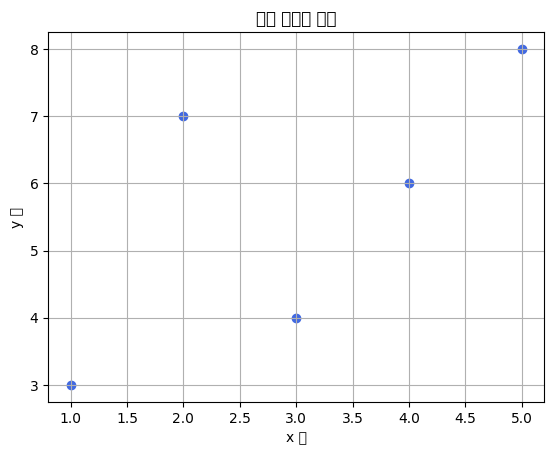

In [1]:
import matplotlib.pyplot as plt

# 샘플 데이터
x = [1, 2, 3, 4, 5]
y = [3, 7, 4, 6, 8]

# 산점도 그리기
plt.scatter(x, y, color='royalblue', marker='o')

# 제목 및 레이블
plt.title('기본 산점도 예제')
plt.xlabel('x 값')
plt.ylabel('y 값')

plt.grid(True)
plt.show()


## 2. 금융 예제: 거래량 vs 종가 (삼성전자)

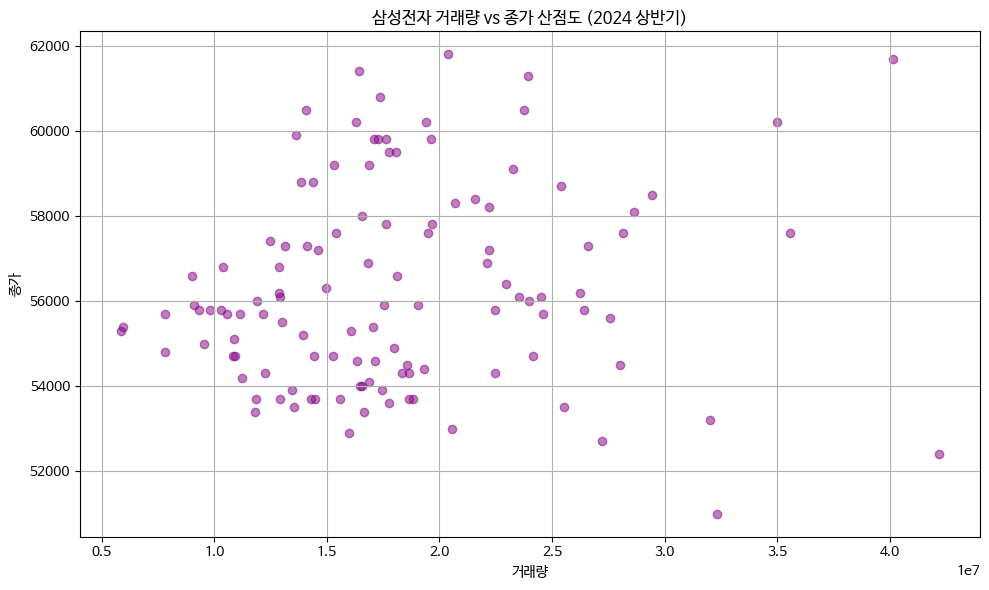

In [3]:
from pykrx import stock
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 가져오기
df = stock.get_market_ohlcv_by_date("2025-01-01", "2025-06-30", "005930")
df.index = pd.to_datetime(df.index)

# 산점도: 거래량 vs 종가
plt.figure(figsize=(10, 6))
plt.scatter(df['거래량'], df['종가'], alpha=0.5, color='purple')

plt.title("삼성전자 거래량 vs 종가 산점도 (2024 상반기)")
plt.xlabel("거래량")
plt.ylabel("종가")
plt.grid(True)
plt.tight_layout()
plt.show()


## 3. 삼성전자와 sk하이닉스 

In [ ]:
# X축: 삼성전자 종가

# Y축: SK하이닉스 종가

# 두 종목 간 가격 상관관계를 시각적으로 파악

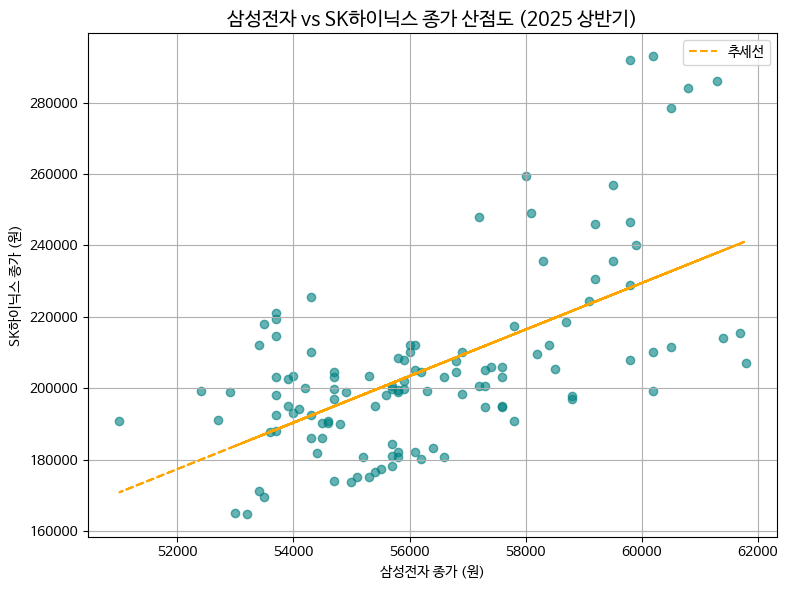

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from pykrx import stock

# 조회 기간 설정
start_date = "2025-01-01"
end_date = "2025-06-30"

# 종가 데이터 가져오기
samsung = stock.get_market_ohlcv_by_date(start_date, end_date, "005930")['종가']
sk_hynix = stock.get_market_ohlcv_by_date(start_date, end_date, "000660")['종가']

# 인덱스 정리 및 병합
df = pd.DataFrame({
    '삼성전자': samsung,
    'SK하이닉스': sk_hynix
})
df.dropna(inplace=True)

# 산점도 그리기
plt.figure(figsize=(8, 6))
plt.scatter(df['삼성전자'], df['SK하이닉스'], alpha=0.6, color='teal')

# 회귀선 (선택사항)
import numpy as np
fit = np.polyfit(df['삼성전자'], df['SK하이닉스'], 1)
plt.plot(df['삼성전자'], np.poly1d(fit)(df['삼성전자']), color='orange', linestyle='--', label='추세선')

# 라벨링
plt.title('삼성전자 vs SK하이닉스 종가 산점도 (2025 상반기)', fontsize=14)
plt.xlabel('삼성전자 종가 (원)')
plt.ylabel('SK하이닉스 종가 (원)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# 점들이 우상향하면 두 종목 간 양의 상관관계

# 점들이 퍼져 있다면 상관관계가 낮을 수 있음

# 추세선은 전반적인 가격 동조화 경향성 확인에 도움

## 4. 삼성전자와 현대치

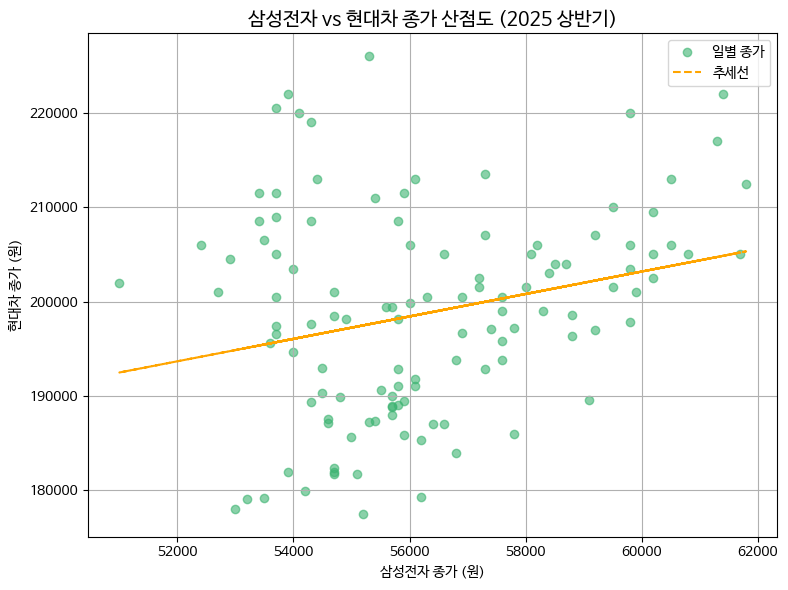

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from pykrx import stock
import numpy as np

# 조회 기간 설정
start_date = "2025-01-01"
end_date = "2025-06-30"

# 삼성전자 및 현대차 종가 데이터 불러오기
samsung = stock.get_market_ohlcv_by_date(start_date, end_date, "005930")['종가']
hyundai = stock.get_market_ohlcv_by_date(start_date, end_date, "005380")['종가']

# 인덱스 통일 및 병합
df = pd.DataFrame({
    '삼성전자': samsung,
    '현대차': hyundai
})
df.dropna(inplace=True)

# 산점도 그리기
plt.figure(figsize=(8, 6))
plt.scatter(df['삼성전자'], df['현대차'], alpha=0.6, color='mediumseagreen', label='일별 종가')

# 추세선(선택)
fit = np.polyfit(df['삼성전자'], df['현대차'], 1)
plt.plot(df['삼성전자'], np.poly1d(fit)(df['삼성전자']), linestyle='--', color='orange', label='추세선')

# 라벨링
plt.title('삼성전자 vs 현대차 종가 산점도 (2025 상반기)', fontsize=14)
plt.xlabel('삼성전자 종가 (원)')
plt.ylabel('현대차 종가 (원)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
